# Import libraries:

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

#importing classifiers:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Reading dataset:

In [4]:
df = pd.read_csv('Ecommerce_Customers.csv')

In [5]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Removing unwanted columns:

In [7]:
df.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df1 = df.copy()

## Handdling missing, duplicates and outliers:

In [10]:
print('Missing values : ')
print(df.isnull().sum())

Missing values : 
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [11]:
print('Duplicate values : ', df.duplicated().sum())

Duplicate values :  0


In [12]:
## Outlier handdle: (instead of removing, cap the values)
# creating a function for capping outliers based on IQR:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values instead of removing rows
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to all numerical columns:
for col in df.columns:
    cap_outliers(df, col)
print("\033[1mCapping applied to numerical columns.\033[0m")

Capping applied to numerical columns.


In [13]:
## Verifying all outliers handdled or not:
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(remaining_outliers)} remaining outliers")

Avg Session Length: 0 remaining outliers
Time on App: 0 remaining outliers
Time on Website: 0 remaining outliers
Length of Membership: 0 remaining outliers
Yearly Amount Spent: 0 remaining outliers


## Feature Engineering:

In [15]:
## Standardscaler
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

**Why?**

 - Improves Model Performance.
 - large values can dominate the model's learning process.
 - some algorithm converge faster when data is standardized.

# Separating Feature and target column:

In [18]:
feature = df.drop(columns='Yearly Amount Spent')
target = df['Yearly Amount Spent']

**Transforming data**

In [20]:
arr1 = feature_scaler.fit_transform(df[feature.columns])
arr1

array([[ 1.46687436,  0.61192073,  2.50219694,  0.56181113],
       [-1.14575886, -0.96299343,  0.20700135, -0.88990136],
       [-0.05371219, -0.73807396,  0.04956686,  0.58424563],
       ...,
       [-0.41358557, -0.56580099,  1.26439314,  1.45790252],
       [ 0.27308223,  0.34278398, -0.21936146, -1.22509963],
       [ 0.67293454,  0.37067805, -1.28217342, -0.8171151 ]],
      shape=(500, 4))

In [21]:
df[feature.columns] = arr1

In [22]:
arr2 = target.values.reshape(-1, 1)
arr2

array([[587.95105397],
       [392.20493344],
       [487.54750487],
       [581.85234404],
       [599.40609205],
       [637.10244792],
       [521.57217476],
       [549.90414611],
       [570.20040896],
       [427.1993849 ],
       [492.60601272],
       [522.33740461],
       [408.64035107],
       [573.41586733],
       [470.4527333 ],
       [461.7807422 ],
       [457.84769594],
       [407.70454755],
       [452.31567548],
       [605.0610388 ],
       [534.70574381],
       [419.93877484],
       [436.51560573],
       [519.34098913],
       [700.91709162],
       [423.17999168],
       [619.89563986],
       [486.83893477],
       [529.53766534],
       [554.72208383],
       [497.5866713 ],
       [447.68790654],
       [588.71260551],
       [491.07322368],
       [507.44183234],
       [521.88357317],
       [347.77692663],
       [490.73863214],
       [478.17033405],
       [537.84619527],
       [532.75178758],
       [501.87443028],
       [591.19717818],
       [547

In [23]:
arr2 = target_scaler.fit_transform(arr2)
arr2 = pd.Series(arr2.flatten())
arr2

0      1.136630
1     -1.370413
2     -0.149301
3      1.058520
4      1.283342
         ...   
495    0.955996
496    0.382235
497    0.671317
498   -0.547336
499   -0.018264
Length: 500, dtype: float64

In [24]:
df['Yearly Amount Spent'] = arr2

**Before VS After**

In [26]:
print('\033[1mBefore standardization : \033[0m\n', df1.head(), '\n')
print('\033[1mAfter standardization : \033[0m\n', df.head())

Before standardization : 
    Avg Session Length  Time on App  Time on Website  Length of Membership  \
0           34.497268    12.655651        39.577668              4.082621   
1           31.926272    11.109461        37.268959              2.664034   
2           33.000915    11.330278        37.110597              4.104543   
3           34.305557    13.717514        36.721283              3.120179   
4           33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092   

After standardization : 
    Avg Session Length  Time on App  Time on Website  Length of Membership  \
0            1.466874     0.611921         2.502197              0.561811   
1           -1.145759    -0.962993         0.207001             -0.889901   
2           -0.053712    -0.738074         0.049567              0.584246   
3            1.272058   

## Final dataset:

In [28]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.466874,0.611921,2.502197,0.561811,1.136630
1,-1.145759,-0.962993,0.207001,-0.889901,-1.370413
2,-0.053712,-0.738074,0.049567,0.584246,-0.149301
3,1.272058,1.693510,-0.337469,-0.423105,1.058520
4,0.281386,0.754050,0.473129,0.933991,1.283342


In [29]:
features = df.drop(columns='Yearly Amount Spent')
target = df['Yearly Amount Spent']

## Split data into train test:

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 4) (100, 4) (400,) (100,)


# Model build:

## 1. Linear regression:

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
## Prediction:
## testing prediction:
y_pred = lr.predict(x_test)
## training prediction:
y_pred_1 = lr.predict(x_train)
print(y_pred)

[ 0.32078456 -0.93051497 -2.26187134  0.05850352 -0.43885449 -0.15894204
 -1.60527145  0.68645238 -1.36730248  0.16808028  0.05926576  0.91842604
 -2.05424153 -0.39260919  0.24390283 -0.02556813  0.21756221  0.04879445
  0.1126189  -2.83414776 -0.04870884  0.74387537  1.01404634  2.05346913
  0.85953027 -0.27116322 -0.92808782  1.5980008   1.28676594 -0.64865797
 -1.42986755 -0.19152686 -0.90360432 -0.11325269  0.76533326  0.10389299
 -0.07451583  0.20039691  0.1761735   0.95499372  0.68860518 -1.9751995
  0.63800657  0.20932672 -1.53764805  0.08452725 -0.35575497  0.17872477
 -0.88450741  0.08135234 -1.12961529 -0.47184195  0.52763301  0.97202966
 -2.8991365  -1.55373306  1.28341736  0.74168664  1.15018771  0.46128276
  2.47857706  2.63980741  0.03362755 -0.92587314  0.04593112  0.26379658
 -0.79735829 -0.08493752 -0.08952121 -0.82635005  1.31664762 -1.28021816
  0.14105753  0.86643333 -0.36523399 -0.41313691  0.94271458 -0.25731152
 -0.48905157 -0.252039   -1.41172173 -0.72313336 -0.

In [38]:
## Scores:
lr_training_score = round(r2_score(y_train,y_pred_1), 2)
lr_testing_score = round(r2_score(y_test, y_pred), 2)
lr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', lr_training_score)
print('testing_score :', lr_testing_score)
print('Root mean squared error :', lr_rmse)

training_score : 0.98
testing_score : 0.97
Root mean squared error : 0.17


**Advantages of Linear Regression:**

- `Simplicity & Interpretability` – Easy to understand, implement, and interpret.
- `Efficiency` – Requires less computational power compared to complex models.
- `Feature Importance` – Helps in identifying the impact of independent variables on the dependent variable.
- `Works Well for Linearly Separable Data` – Provides accurate predictions when data has a linear relationship.
- `Less Overfitting (in Simple Models)` – Compared to more complex models, it generalizes well if assumptions hold.
- `Good Baseline Model` – Often used as a benchmark before applying more advanced techniques.

## 2. Support vector Regressor:

**Parameters:**
- `kernel` : Specifies the kernel type ('linear', 'poly', 'rbf' (default), 'sigmoid').
- `C` : Regularization parameter (higher values reduce bias but increase variance).
- `epsilon` : Defines a margin of tolerance where no penalty is given.
- `gamma` : Defines the influence of a single training example (used in 'rbf', 'poly', 'sigmoid').

In [42]:
svr = SVR(kernel='rbf', gamma=0.3)
svr.fit(x_train, y_train)

SVR(gamma=0.3)

In [43]:
## Prediction:
## testing prediction:
y_pred = svr.predict(x_test)
## training prediction:
y_pred_1 = svr.predict(x_train)
print(y_pred)

[ 0.28072603 -0.82943429 -1.63266418  0.19296697 -0.41227208 -0.15280943
 -1.55817501  0.75713228 -1.31025589  0.19054189  0.07042414  0.97224558
 -1.57899188 -0.37430417  0.3147322   0.00745202  0.31609901  0.04229984
  0.13646237 -1.56760271  0.01632794  0.81174968  0.92079836  2.25291907
  0.78042407 -0.22413965 -0.9592308   1.66437799  1.16909844 -0.60516339
 -1.07222125 -0.17537248 -0.8918704  -0.05896292  0.82779884  0.14650559
 -0.05532437  0.21713523  0.2117611   0.99680571  0.59758205 -1.76238354
  0.58625378  0.33884965 -1.5515824   0.12135872 -0.34010855  0.19565033
 -0.77030425  0.07837078 -1.14871005 -0.54168751  0.60375671  0.89752772
 -1.72881468 -1.58455855  1.28506675  0.72408713  1.10906148  0.51428532
  1.37862224  2.05884237  0.03584595 -0.83661684 -0.05321265  0.29075617
 -0.79021279 -0.05030882 -0.00326487 -0.80461157  1.34272793 -1.0998623
  0.16633361  0.86597664 -0.3200165  -0.42434389  0.95670786 -0.22674319
 -0.43133672 -0.33149765 -1.35960976 -0.73665871 -0.

In [44]:
## Scores:
svr_training_score = round(r2_score(y_train,y_pred_1), 2)
svr_testing_score = round(r2_score(y_test, y_pred), 2)
svr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', svr_training_score)
print('testing_score :', svr_testing_score)
print('Root mean squared error :', svr_rmse)

training_score : 0.98
testing_score : 0.92
Root mean squared error : 0.3


**Advantages of SVR:**
- Works well for non-linear relationships.
- Handles outliers better than standard regression.
- Useful when data is not normally distributed.

## 3. Decission Tree Regressor:

**Parameters:**

- `max_depth`- Limits the depth of the tree to prevent overfitting.
- `min_samples_split`- Minimum samples required to split a node.
- `min_samples_leaf`- Minimum samples required at a leaf node.
- `max_features`- Number of features to consider when making a split.

In [48]:
dtr = DecisionTreeRegressor(max_depth=3, splitter='random', criterion='squared_error')

In [49]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, splitter='random')

In [50]:
## Prediction:
## testing prediction:
y_pred = dtr.predict(x_test)
## training prediction:
y_pred_1 = dtr.predict(x_train)
print(y_pred)

[ 0.58966796 -0.2159152  -1.11784459  0.58966796 -0.2159152  -0.2159152
 -0.80971136  0.58966796 -0.80971136  0.58966796 -0.2159152   0.67534636
 -0.80971136  0.58966796 -0.2159152  -0.2159152   0.58966796 -0.2159152
 -0.2159152  -1.8693824   0.67534636  0.67534636 -0.2159152   1.53628599
  1.53628599 -0.2159152  -0.2159152   0.58966796 -0.2159152  -0.2159152
 -0.2159152  -0.80971136 -0.80971136 -0.2159152   0.58966796  0.58966796
 -0.2159152  -0.2159152  -0.2159152   0.58966796  0.58966796 -1.8693824
  0.58966796  0.58966796 -0.80971136 -0.2159152  -0.80971136 -0.2159152
 -1.8693824  -0.2159152  -0.2159152  -0.2159152   0.58966796 -0.2159152
 -1.8693824  -1.8693824   1.53628599  0.58966796  0.67534636  0.67534636
  1.53628599  1.53628599 -0.2159152  -0.2159152  -0.2159152   0.58966796
 -0.2159152  -0.2159152  -0.2159152  -0.2159152   0.58966796 -0.2159152
 -0.80971136 -0.2159152  -0.2159152  -0.2159152   0.67534636 -0.2159152
 -1.11784459  0.67534636 -0.2159152  -0.2159152  -0.2159152

In [51]:
## Scores:
dtr_training_score = round(r2_score(y_train,y_pred_1), 2)
dtr_testing_score = round(r2_score(y_test, y_pred), 2)
dtr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', dtr_training_score)
print('testing_score :', dtr_testing_score)
print('Root mean squared error :', dtr_rmse)

training_score : 0.65
testing_score : 0.65
Root mean squared error : 0.63


**Advantages:**

- Handles both numerical and categorical data.
- Easy to interpret.
- No need for feature scaling.

## 4. KNN Regressor:

**Parameters:**

- `n_neighbors`- Number of nearest neighbors to consider.
- `weights`-
    - `'uniform'`: Equal weight for all neighbors.
    - `'distance'`: Closer neighbors have higher weight.
- `metric`- Distance measure (e.g., 'euclidean', 'manhattan').

In [55]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [56]:
## Prediction:
## testing prediction:
y_pred = knn.predict(x_test)
## training prediction:
y_pred_1 = knn.predict(x_train)
print(y_pred)

[ 0.07255758 -0.69517033 -1.56352944  0.13863102 -0.58447403 -0.13878579
 -1.14135335  0.62869947 -1.1533716   0.06459767 -0.06404212  0.82642093
 -1.39835735 -0.36834647  0.37242431 -0.12277029 -0.09704346 -0.28132887
  0.04099885 -1.69949064  0.45937914  0.85724751  0.88166661  1.60680487
  0.75845503 -0.15893567 -0.78710626  1.28950735  0.83851019 -0.3680767
 -0.91326059 -0.39269632 -0.92410742 -0.01912018  0.71527596 -0.04919065
  0.07289946 -0.03753139  0.18774675  1.05929748  0.72075026 -1.66869202
  0.75218356 -0.02741083 -1.14591803 -0.00610944 -0.21746863  0.35407455
 -0.60914886  0.26598537 -0.94228799 -0.49969884  0.50367018  0.76534415
 -2.01475653 -1.34877815  1.21951705  0.56754853  0.82413495  0.72856345
  1.48782178  2.01144125 -0.04948411 -0.4779669   0.01209522  0.2259845
 -0.43686913 -0.09429973 -0.20857955 -0.77391724  0.97498108 -1.16735357
 -0.07279418  0.8254081  -0.46564467 -0.07328245  0.66821027 -0.21325944
 -0.45720658 -0.19643504 -1.13009004 -0.63084547 -0.2

In [57]:
## Scores:
knn_training_score = round(r2_score(y_train,y_pred_1), 2)
knn_testing_score = round(r2_score(y_test, y_pred), 2)
knn_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', knn_training_score)
print('testing_score :', knn_testing_score)
print('Root mean squared error :', knn_rmse)

training_score : 0.95
testing_score : 0.91
Root mean squared error : 0.32


**Advantages:**

- Simple and easy to implement.
- No training time required (lazy learning).
- Works well for non-linear data.

## 5. Gradient Boost Regressor:

**Parameters:**

- `n_estimators`- Number of boosting stages (default: 100).
- `learning_rate`- Shrinks contribution of each tree (default: 0.1).
- `max_depth`- Limits depth of individual trees (default: 3).
- `subsample`- Fraction of samples used for training each tree (default: 1.0).
- `loss`- Loss function to be optimized ('squared_error' for regression).

In [61]:
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.5, subsample=0.9)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=50, subsample=0.9)

In [62]:
## Prediction:
## testing prediction:
y_pred = gbr.predict(x_test)
## training prediction:
y_pred_1 = gbr.predict(x_train)
print(y_pred)

[ 0.64981951 -0.50000039 -2.16566817 -0.19863658 -0.45192409 -0.00715909
 -1.44064296  0.42955142 -0.96731862  0.06909749  0.30700641  1.00615213
 -1.91548398 -0.32387918  0.76966713 -0.03032475  0.39419742  0.11537064
  0.12548436 -2.35153107  0.01659601  0.57885417  0.80971461  2.15829157
  0.87836284 -0.19827685 -0.50599293  1.21690692  1.21177652 -0.76969704
 -1.65241824 -0.10257408 -0.94824772 -0.04880171  0.81834207  0.29109427
 -0.28136305 -0.03117365  0.23116012  0.79554814  0.9029335  -1.94466319
  0.42696664  0.37079346 -1.45807753 -0.16133524 -0.33711602  0.20955852
 -0.78552324  0.17843687 -0.94961151 -0.61056552  0.48808407  1.02388733
 -2.42038538 -1.60710621  1.25363877  0.53027285  0.47250774  0.27739756
  2.2378256   2.51970252 -0.077752   -0.94424827 -0.10057053  0.14780418
 -0.50377738  0.03880186 -0.22470367 -0.75081245  1.51876105 -1.02269042
 -0.00418103  0.82960168 -0.30459797 -0.69710637  0.98700174  0.09656837
 -0.44237189 -0.17678423 -1.415763   -0.67741756 -0

In [63]:
## Scores:
gbr_training_score = round(r2_score(y_train,y_pred_1), 2)
gbr_testing_score = round(r2_score(y_test, y_pred), 2)
gbr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', gbr_training_score)
print('testing_score :', gbr_testing_score)
print('Root mean squared error :', gbr_rmse)

training_score : 1.0
testing_score : 0.95
Root mean squared error : 0.25


**Advantages:**

- Handles non-linear data well.
- Feature importance analysis.
- Works with missing data.

## 6. Xtream Gradient Boost Regressor:

**Parameters:**
- `n_estimators`- Number of boosting iterations (default: 100).
- `learning_rate`- Step size shrinkage to prevent overfitting (default: 0.1).
- `max_depth`- Depth of individual trees (default: 3).
- `subsample`- Fraction of samples used for training each tree (default: 1.0).
- `gamma`- Minimum loss reduction required to make a split.


In [67]:
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [68]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
## Prediction:
## testing prediction:
y_pred = xgbr.predict(x_test)
## training prediction:
y_pred_1 = xgbr.predict(x_train)
print(y_pred)

[ 4.71526146e-01 -6.57132566e-01 -1.76916337e+00 -1.13316655e-01
 -5.50841510e-01 -1.19035497e-01 -1.44081628e+00  5.70171654e-01
 -1.21561122e+00  3.29198465e-02  1.70898363e-01  8.26515317e-01
 -1.80212784e+00 -2.11317807e-01  3.51093799e-01 -6.34411648e-02
  2.37820745e-01  7.36594573e-02  9.85074937e-02 -2.42619467e+00
  1.03478223e-01  6.75965369e-01  9.04900730e-01  2.04287481e+00
  8.11950505e-01 -1.78402856e-01 -7.03676999e-01  1.31803405e+00
  1.10807562e+00 -5.47325790e-01 -1.31584060e+00 -2.74253547e-01
 -9.85245943e-01 -4.88673560e-02  6.86395586e-01  2.50020891e-01
 -3.84763330e-01  8.59966353e-02  2.27813393e-01  7.75414467e-01
  5.77268898e-01 -2.07049942e+00  5.81832826e-01  1.35041088e-01
 -1.49807489e+00 -2.06196569e-02 -3.13290030e-01  2.41233274e-01
 -7.78275788e-01  1.02436163e-01 -1.14179552e+00 -3.67277950e-01
  5.86477816e-01  1.01678765e+00 -2.42348218e+00 -1.60579145e+00
  1.27590108e+00  5.43031335e-01  8.79027665e-01  4.47706789e-01
  2.26377153e+00  2.32662

In [70]:
## Scores:
xgbr_training_score = round(r2_score(y_train,y_pred_1), 2)
xgbr_testing_score = round(r2_score(y_test, y_pred), 2)
xgbr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', xgbr_training_score)
print('testing_score :', xgbr_testing_score)
print('Root mean squared error :', xgbr_rmse)

training_score : 0.99
testing_score : 0.96
Root mean squared error : 0.21


**Advantages:**
  
- Faster than traditional Gradient Boosting.
- Handles missing values automatically.
- Regularization helps prevent overfitting.
- Works well with large datasets.

## 7. AdaBoost Regressor:

**Parameters:**

- `base_estimator`- The weak learner (default: DecisionTreeRegressor(max_depth=3)).
- `n_estimators`- Number of boosting iterations (default: 50).
- `learning_rate`- Step size shrinkage to prevent overfitting (default: 1.0).
- `loss`- Loss function to optimize ('linear', 'square', 'exponential').

In [74]:
adr = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
adr.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)

In [75]:
## Prediction:
## testing prediction:
y_pred = adr.predict(x_test)
## training prediction:
y_pred_1 = adr.predict(x_train)
print(y_pred)

[ 0.7519763   0.0898993  -1.94213668 -0.02048494 -0.75316848  0.13766328
 -1.02318609  0.17284783 -1.0267952   0.02400326  0.20629826  0.67967904
 -1.02689266 -0.08385625  0.13766328 -0.13053766  0.0824924   0.33258845
 -0.04157092 -1.95233593  0.50227445  0.5568009   0.84922295  1.96861417
  0.95568378 -0.1723748  -0.30571265  1.00397865  0.7519763  -0.46974492
 -0.93077694 -0.26747941 -1.04970682 -0.11654455  0.17284783 -0.06620393
 -0.47672229 -0.01070394  0.46500428  0.17399187  0.17284783 -1.91967164
  0.76374955 -0.01990676 -1.01882504  0.12537943 -0.25729106  0.28645833
 -0.8930848   0.4115988  -0.76813284  0.12537943  0.74995599  0.83758858
 -1.9597905  -1.8246999   1.02364813 -0.0607063   0.78454746  0.49071381
  1.72672622  2.09570884  0.48402003 -0.29483042  0.33258845  0.04278782
 -0.31298344 -0.08385625 -0.06620393 -0.47719911  0.86394601 -0.75378945
 -0.148944    0.36970509 -0.40910612 -0.76247092  0.71740272 -0.09576952
 -0.81239108  0.47500127 -0.94919445 -0.76813284 -0

In [76]:
## Scores:
adr_training_score = round(r2_score(y_train,y_pred_1), 2)
adr_testing_score = round(r2_score(y_test, y_pred), 2)
adr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', adr_training_score)
print('testing_score :', adr_testing_score)
print('Root mean squared error :', adr_rmse)

training_score : 0.88
testing_score : 0.83
Root mean squared error : 0.44


**Advantages:**

- Reduces variance and improves weak learners.
- Works well with non-linear data.
- Robust to overfitting with proper tuning.

## 8. BaggingRegressor:

**Parameters:**

- `estimator`: The weak learner (e.g., Decision Tree, Linear Regression, etc).
- `n_estimators`: Number of models to train (default = 10).
- `max_samples`: Fraction of the dataset used for training each base model (default = 1.0).
- `max_features`: Fraction of features used for training each base model (default = 1.0).
- `bootstrap`: Whether to sample with replacement (default = True).

In [80]:
bgr = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bgr.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,
                 random_state=42)

In [81]:
## Prediction:
## testing prediction:
y_pred = bgr.predict(x_test)
## training prediction:
y_pred_1 = bgr.predict(x_train)
print(y_pred)

[ 0.39002043 -0.52406813 -1.8184931  -0.08985433 -0.63982943 -0.03205783
 -1.29584389  0.55740003 -1.16441685 -0.08360244  0.16795325  0.80606196
 -1.42363021 -0.36204773  0.3484503  -0.12131573  0.20757214  0.10523749
  0.02403082 -2.17516768  0.28057006  0.73694793  0.97211893  2.05445215
  0.70776433 -0.07202132 -0.59355998  1.41876688  1.12113078 -0.57829564
 -1.14653793 -0.26312607 -0.8579691  -0.17812681  0.61065569  0.11077001
 -0.53512303 -0.02573226  0.21439359  0.64094959  0.54600827 -1.94208883
  0.75430491  0.12035664 -1.34735257  0.07725006 -0.43416397  0.36994084
 -1.06241574  0.15968857 -1.27514818 -0.08962852  0.74260539  0.96711236
 -2.2700572  -1.47815555  1.15352499  0.47373396  0.96203656  0.46025126
  1.954635    2.42697493  0.25045324 -0.63967365 -0.06888655  0.04626549
 -0.66373999 -0.11637809 -0.22583481 -0.79245082  1.12951671 -1.52052036
 -0.04736032  0.68539147 -0.46595813 -0.63745877  0.76428652 -0.22615105
 -0.70633749  0.04760583 -1.13289044 -0.80944285 -0

In [82]:
## Scores:
bgr_training_score = round(r2_score(y_train,y_pred_1), 2)
bgr_testing_score = round(r2_score(y_test, y_pred), 2)
bgr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', bgr_training_score)
print('testing_score :', bgr_testing_score)
print('Root mean squared error :', bgr_rmse)

training_score : 0.99
testing_score : 0.94
Root mean squared error : 0.26


**Advantages:**

- Reduces variance and prevents overfitting
- Works well with high-dimensional datasets
- Improves model stability

## 9. Random forest Regressor:

**Parameters:**
- `n_estimators`: Number of trees in the forest (default = 100).
- `max_depth`: Maximum depth of each tree (None = until all leaves are pure).
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples in each leaf node.

In [86]:
rfr = RandomForestRegressor(n_estimators=50, max_samples=1.0, max_features='log2')

In [87]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_features='log2', max_samples=1.0, n_estimators=50)

In [88]:
## Prediction:
## testing prediction:
y_pred = rfr.predict(x_test)
## training prediction:
y_pred_1 = rfr.predict(x_train)
print(y_pred)

[ 0.44207319 -0.34337612 -1.74220671 -0.16365341 -0.43977215  0.04536034
 -1.25827418  0.49856372 -1.25957068  0.01119483  0.13808416  0.791196
 -1.30855235 -0.32894628  0.30584201 -0.08949319  0.26583846  0.07564516
  0.02429016 -1.97035556  0.11319001  0.75943377  0.97580802  1.83583835
  0.75894384 -0.102934   -0.60124483  1.20388394  1.09170784 -0.67730848
 -1.15789996 -0.23328093 -1.01783961 -0.17527858  0.64810492  0.06193187
 -0.33603925  0.09456186  0.29926572  0.62783385  0.49457568 -1.7762638
  0.72560552  0.11296335 -1.22923073  0.0390113  -0.33240132  0.29888975
 -0.81254367  0.12195241 -0.94238297 -0.14333614  0.67803524  0.91012661
 -2.04194039 -1.3633242   1.20578151  0.4022381   0.93574031  0.6023059
  2.06448367  2.24191722  0.14715855 -0.61653507  0.00558344  0.11610803
 -0.76719726 -0.09483899 -0.13967218 -0.66664881  1.14733593 -1.09830772
 -0.06311174  0.65610805 -0.3522224  -0.38845561  0.8188191  -0.12337828
 -0.54708942  0.02983927 -1.13802108 -0.75805966 -0.424

In [89]:
## Scores:
rfr_training_score = round(r2_score(y_train,y_pred_1), 2)
rfr_testing_score = round(r2_score(y_test, y_pred), 2)
rfr_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

print('training_score :', rfr_training_score)
print('testing_score :', rfr_testing_score)
print('Root mean squared error :', rfr_rmse)

training_score : 0.99
testing_score : 0.93
Root mean squared error : 0.27


**Advantages:**

- `Handles Non-Linearity` – Works well with complex data.
- `Reduces Overfitting` – Uses multiple trees for better generalization.
- `Handles Missing Values` – Manages missing data efficiently.
- `Feature Importance` – Identifies key features automatically.
- `Robust to Noise & Outliers` – Less sensitive to fluctuations.
- `Scalable & Parallelizable` – Works well on large datasets.

# Model Evaluation:

## Creating a DataFrame to visualize all scores and errors:

In [93]:
dict = {'Model':['Linear', 'SVR', 'DecissionTree', 'KNN', 'GradientBoost', 'XGBoost', 'AdaBoost', 'Bagging', 'Randomforest'],
        'Training_score':[lr_training_score, svr_training_score, dtr_training_score, knn_training_score, gbr_training_score, xgbr_training_score, adr_training_score, bgr_training_score, rfr_training_score],
        'Testing_score':[lr_testing_score, svr_testing_score, dtr_testing_score, knn_testing_score, gbr_testing_score, xgbr_testing_score, adr_testing_score, bgr_testing_score, rfr_testing_score],
        'RMSE':[lr_rmse, svr_rmse, dtr_rmse, knn_rmse, gbr_rmse, xgbr_rmse, adr_rmse, bgr_rmse, rfr_rmse]
       }

In [94]:
model_scores = pd.DataFrame(dict)
model_scores

,Model,Training_score,Testing_score,RMSE
0,Linear,0.98,0.97,0.17
1,SVR,0.98,0.92,0.30
2,DecissionTree,0.65,0.65,0.63
3,KNN,0.95,0.91,0.32
4,GradientBoost,1.00,0.95,0.25
5,XGBoost,0.99,0.96,0.21
6,AdaBoost,0.88,0.83,0.44
7,Bagging,0.99,0.94,0.26
8,Randomforest,0.99,0.93,0.27


# Visualization:

- For beter and easy way to find the perfect model.
- Select model based on highest score and less error.

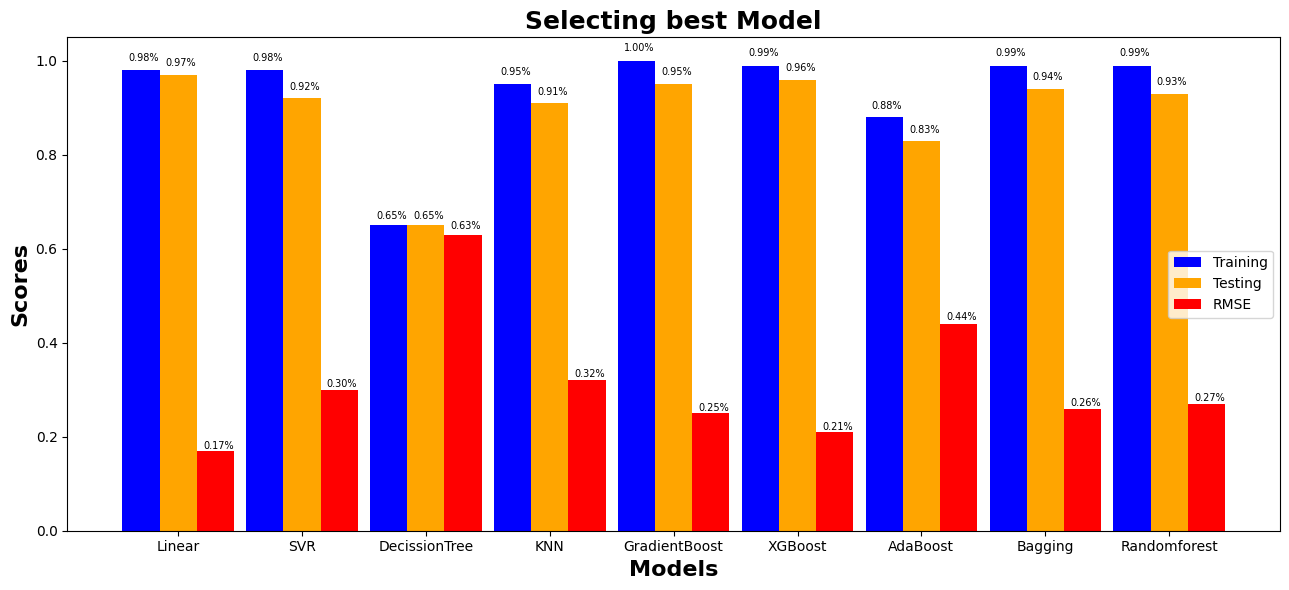

In [97]:
## Selecting model by visualizing scores:
models = ['Linear', 'SVR', 'DecissionTree', 'KNN', 'GradientBoost', 'XGBoost', 'AdaBoost', 'Bagging', 'Randomforest']
training_scores = [lr_training_score, svr_training_score, dtr_training_score, knn_training_score, gbr_training_score, xgbr_training_score, adr_training_score, bgr_training_score, rfr_training_score]
testing_scores = [lr_testing_score, svr_testing_score, dtr_testing_score, knn_testing_score, gbr_testing_score, xgbr_testing_score, adr_testing_score, bgr_testing_score, rfr_testing_score]
RMSE = [lr_rmse, svr_rmse, dtr_rmse, knn_rmse, gbr_rmse, xgbr_rmse, adr_rmse, bgr_rmse, rfr_rmse]

# Positions for the bars
x = np.arange(len(models))
bar_width = 0.3

# Create the plot
fig, ax = plt.subplots(figsize=(13, 6))

# Bars for the training group
bars1 = ax.bar(x - bar_width, training_scores, bar_width, label='Training', color='blue')
# Bars for the testing group
bars2 = ax.bar(x, testing_scores, bar_width, label='Testing', color='orange')
# Bars for the RMSE group
bars3 = ax.bar(x + bar_width, RMSE, bar_width, label='RMSE', color='red')

# Add value labels on top of bars
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(training_scores[i]), fontsize = 7)
    
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(testing_scores[i]), fontsize = 7)

for i, bar in enumerate(bars3):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(RMSE[i]), fontsize = 7)

# Customize the plot
ax.set_xlabel('Models', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Scores', fontsize = 16, fontweight = 'bold')
ax.set_title('Selecting best Model', fontsize = 18, fontweight = 'bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Observations:**

- **Best Performing Models (Highest R² Scores)**:
    - GradientBoost, XGBoost, and RandomForest show the highest `training and testing scores (~0.99-1.00)`, indicating strong predictive power and generalization.
- **Overfitting Observations**:
    - DecisionTree and AdaBoost have a significant gap between training and testing scores, suggesting overfitting.
    - The DecisionTree model has a `high RMSE (~0.69)`, meaning it does not generalize well to unseen data.
- **Stable Models (Balanced Training & Testing Scores)**:
    - Linear Regression and SVR have similar `training and testing scores (~0.98)`, indicating good generalization.
- **Weak Models (Lower R² Scores & Higher RMSE)**:
    - DecisionTree and KNN have `lower testing scores (~0.57–0.91)` and higher RMSE compared to ensemble methods.
    - KNN's `RMSE (~0.32)` suggests it struggles with complex relationships.

**Key Insights:**
- `Best Generalization:` Linear Regression has almost equal training and testing scores, indicating that it generalizes well without overfitting.
- `Lowest RMSE:` The RMSE (~0.17%) is the smallest among all models, meaning its predictions are very close to actual values.
- `Simplicity & Interpretability:` Unlike complex models (e.g., XGBoost, RandomForest), Linear Regression is simple, easy to interpret, and computationally efficient.

# Coefficients:

**Why?**
- Features with large coefficients are most important.
- Near-zero coefficients may not contribute much.

In [102]:
# Extract feature coefficients
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lr.coef_
})

# Sort by absolute coefficient value
feature_importance["Abs_Coefficient"] = np.abs(feature_importance["Coefficient"])
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# Display Top Features
print(feature_importance.drop(columns="Abs_Coefficient"))

                Feature  Coefficient
3  Length of Membership     0.783699
1           Time on App     0.490987
0    Avg Session Length     0.321667
2       Time on Website     0.006644


**Conclusion:**
- Time on App has a higher coefficient than Time on Website, the company should focus on improving the mobile app.

## Exporting model for deployment:

In [105]:
file_feature_scaler = 'feature_scaler.pkl'
file_target_scaler = 'target_scaler.pkl'
file_lr = 'model_lr.pkl'
pickle.dump(feature_scaler,open(file_feature_scaler,'wb'))
pickle.dump(target_scaler,open(file_target_scaler,'wb'))
pickle.dump(lr,open(file_lr,'wb'))